<a href="https://colab.research.google.com/github/fjadidi2001/Artificial_Intelligence_Learning/blob/master/Final_radial_basis_function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import numpy as np # For numerical operations and array handling
import matplotlib.pyplot as plt # To create insightful plots.
from sklearn.datasets import make_classification # To generate a sample dataset, perform train-test splits, and evaluate our RBFN model.
from sklearn.model_selection import train_test_split # To standardize our dataset.
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist # For calculating pairwise distances between data points.
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


In [62]:
# Load the train dataset
'''
Load the train dataset from a csv file called 'spiral_100.csv'
with tab separation, no header, and columns named 'feature1', 'feature2', and 'label'. The decimal point is set to ','.
'''
df_train = pd.read_csv('spiral_100.csv', sep='\t', header=None, names=['feature1', 'feature2', 'label'], decimal=',')
print(df_train.describe) # Display the description of the train dataset.

# Create the training input data 'X_train' by selecting the 'feature1' and 'feature2' columns from the train dataset.
X_train = df_train[['feature1', 'feature2']]
y_train = df_train['label']



model = SVC(kernel='rbf', gamma='auto')
model.fit(X_train, y_train)



# Load the test dataset
df_test = pd.read_csv('spiral_g.csv', sep='\t', header=None, names=['feature1', 'feature2', 'label'], decimal=',')
print(df_test.describe)
X_test = df_test[['feature1', 'feature2']]
y_test = df_test['label']

y_test_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_test_pred)
print(f'accuracy: {accuracy}')


<bound method NDFrame.describe of    feature1 feature2  label
0     0.143   0.0443      1
1     0.248    0.169      1
2      0.28    0.352      1
3     0.217    0.559      1
4    0.0531    0.748      1
..      ...      ...    ...
95    -2.28    -6.51     -1
96   -0.262    -7.05     -1
97     1.87    -6.95     -1
98     3.92    -6.22     -1
99      5.7    -4.88     -1

[100 rows x 3 columns]>
accuracy: 0.9813084112149533


In [56]:

# Load the train dataset
df_train = pd.read_csv('spiral_100.csv', sep='\t', header=None, names=['feature1', 'feature2', 'label'], decimal=',')
print(df_train.describe()))

X_train = df_train[['feature1', 'feature2']].values  # Convert to numpy array
y_train = df_train['label'].values  # Convert to numpy array

# Load the test dataset
df_test = pd.read_csv('spiral_g.csv', sep='\t', header=None, names=['feature1', 'feature2', 'label'], decimal=',')
X_test = df_test[['feature1', 'feature2']].values
y_test = df_test['label'].values

# Define the RBF kernel function
def rbf_kernel(X1, X2, gamma):
    X1 = X1.astype(float)  # Convert to float
    X2 = X2.astype(float)  # Convert to float
    pairwise_dists = -2 * np.dot(X1, X2.T) + np.sum(X2**2, axis=1) + np.sum(X1**2, axis=1)[:, np.newaxis]
    return np.exp(-gamma * pairwise_dists)

# Define the predict function using RBF kernel
def predict_rbf(X_train, y_train, X_test, gamma):
    kernel = rbf_kernel(X_train, X_train, gamma)
    alpha = np.linalg.solve(kernel + 1e-4 * np.eye(len(X_train)), y_train)
    y_pred = np.dot(rbf_kernel(X_test, X_train, gamma), alpha)
    return np.sign(y_pred)

# Set the gamma parameter for RBF kernel
gamma = 0.1

# Predict using RBF kernel
y_test_pred = predict_rbf(X_train, y_train, X_test, gamma)

# Calculate accuracy
accuracy100 = np.mean(y_test_pred == y_test)
print(f'accuracy: {accuracy100}')


<bound method NDFrame.describe of    feature1 feature2  label
0     0.143   0.0443      1
1     0.248    0.169      1
2      0.28    0.352      1
3     0.217    0.559      1
4    0.0531    0.748      1
..      ...      ...    ...
95    -2.28    -6.51     -1
96   -0.262    -7.05     -1
97     1.87    -6.95     -1
98     3.92    -6.22     -1
99      5.7    -4.88     -1

[100 rows x 3 columns]>
accuracy: 0.9813084112149533


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


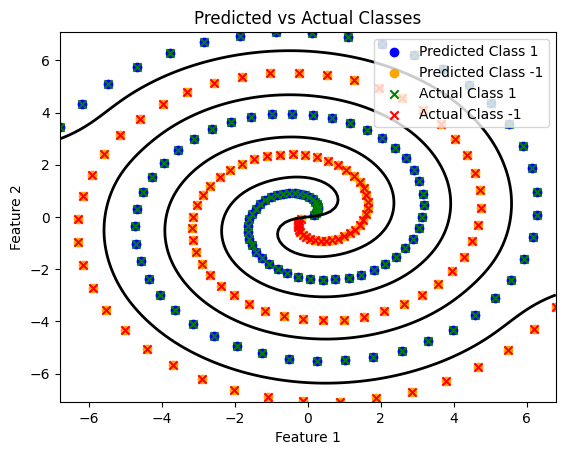

In [12]:

# Differentiate prediction data by label
predicted_class1 = X_test[y_test_pred == 1]
predicted_class2 = X_test[y_test_pred == -1]

# Differentiate actual data by label
actual_class1 = X_test[y_test == 1]
actual_class2 = X_test[y_test == -1]

# first run this, comment meshgrid
# X_test['feature1'] = X_test['feature1'].astype(float)
# X_test['feature2'] = X_test['feature2'].astype(float)

# after that comment two line above then run this
xx, yy = np.meshgrid(np.linspace(X_test['feature1'].min(), X_test['feature1'].max(), 100, dtype=float),np.linspace(X_test['feature2'].min(), X_test['feature2'].max(), 100, dtype=float))


Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the predicted data
plt.scatter(predicted_class1['feature1'], predicted_class1['feature2'], color='blue', label='Predicted Class 1')
plt.scatter(predicted_class2['feature1'], predicted_class2['feature2'], color='orange', label='Predicted Class -1')

# Plot the actual data
plt.scatter(actual_class1['feature1'], actual_class1['feature2'], color='green', marker='x', label='Actual Class 1')
plt.scatter(actual_class2['feature1'], actual_class2['feature2'], color='red', marker='x', label='Actual Class -1')

# plot the classifier line
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='black')

# other setting for plot
plt.title('Predicted vs Actual Classes')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


In [60]:

df_train = pd.read_csv('spiral_150.csv', sep='\t', header=None, names=['feature1', 'feature2', 'label'], decimal=',')
print(df_train.head)
X_train = df_train[['feature1', 'feature2']]
y_train = df_train['label']

model = SVC(kernel='rbf', gamma='auto')


model.fit(X_train, y_train)



df_test = pd.read_csv('spiral_g.csv', sep='\t', header=None, names=['feature1', 'feature2', 'label'], decimal=',')

X_test = df_test[['feature1', 'feature2']]
y_test = df_test['label']

y_test_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_test_pred)
print(f'accuracy: {accuracy}')


<bound method NDFrame.head of     feature1 feature2  label
0      0.143   0.0443      1
1      0.219     0.12      1
2      0.268    0.225      1
3       0.28    0.352      1
4      0.249     0.49      1
..       ...      ...    ...
145     1.16    -7.06     -1
146     2.57    -6.78     -1
147     3.92    -6.22     -1
148     5.15    -5.39     -1
149      6.2    -4.31     -1

[150 rows x 3 columns]>
accuracy: 1.0


In [44]:

# Load the train dataset
df_train = pd.read_csv('spiral_150.csv', sep='\t', header=None, names=['feature1', 'feature2', 'label'], decimal=',')
print(df_train.describe)

X_train = df_train[['feature1', 'feature2']].values  # Convert to numpy array
y_train = df_train['label'].values  # Convert to numpy array

# Load the test dataset
df_test = pd.read_csv('spiral_g.csv', sep='\t', header=None, names=['feature1', 'feature2', 'label'], decimal=',')
X_test = df_test[['feature1', 'feature2']].values
y_test = df_test['label'].values

# Define the RBF kernel function
def rbf_kernel(X1, X2, gamma):
    X1 = X1.astype(float)  # Convert to float
    X2 = X2.astype(float)  # Convert to float
    pairwise_dists = -2 * np.dot(X1, X2.T) + np.sum(X2**2, axis=1) + np.sum(X1**2, axis=1)[:, np.newaxis]
    return np.exp(-gamma * pairwise_dists)

# Define the predict function using RBF kernel
def predict_rbf(X_train, y_train, X_test, gamma):
    kernel = rbf_kernel(X_train, X_train, gamma)
    alpha = np.linalg.solve(kernel + 1e-4 * np.eye(len(X_train)), y_train)
    y_pred = np.dot(rbf_kernel(X_test, X_train, gamma), alpha)
    return np.sign(y_pred)

# Set the gamma parameter for RBF kernel
gamma = 0.1

# Predict using RBF kernel
y_test_pred = predict_rbf(X_train, y_train, X_test, gamma)

# Calculate accuracy
accuracy150 = np.mean(y_test_pred == y_test)
print(f'accuracy: {accuracy150}')


<bound method NDFrame.describe of     feature1 feature2  label
0      0.143   0.0443      1
1      0.219     0.12      1
2      0.268    0.225      1
3       0.28    0.352      1
4      0.249     0.49      1
..       ...      ...    ...
145     1.16    -7.06     -1
146     2.57    -6.78     -1
147     3.92    -6.22     -1
148     5.15    -5.39     -1
149      6.2    -4.31     -1

[150 rows x 3 columns]>
accuracy: 0.9906542056074766


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


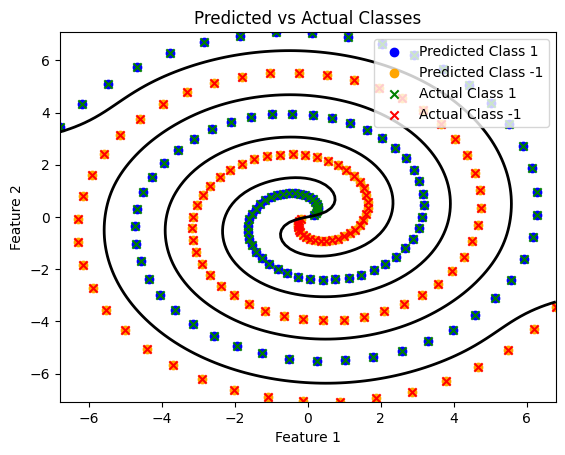

In [49]:

# Differentiate prediction data by label
predicted_class1 = X_test[y_test_pred == 1]
predicted_class2 = X_test[y_test_pred == -1]

# Differentiate actual data by label
actual_class1 = X_test[y_test == 1]
actual_class2 = X_test[y_test == -1]

# first run this, comment meshgrid
# X_test['feature1'] = X_test['feature1'].astype(float)
# X_test['feature2'] = X_test['feature2'].astype(float)

# after that comment two line above then run this
xx, yy = np.meshgrid(np.linspace(X_test['feature1'].min(), X_test['feature1'].max(), 100, dtype=float),np.linspace(X_test['feature2'].min(), X_test['feature2'].max(), 100, dtype=float))


Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the predicted data
plt.scatter(predicted_class1['feature1'], predicted_class1['feature2'], color='blue', label='Predicted Class 1')
plt.scatter(predicted_class2['feature1'], predicted_class2['feature2'], color='orange', label='Predicted Class -1')

# Plot the actual data
plt.scatter(actual_class1['feature1'], actual_class1['feature2'], color='green', marker='x', label='Actual Class 1')
plt.scatter(actual_class2['feature1'], actual_class2['feature2'], color='red', marker='x', label='Actual Class -1')

# plot the classifier line
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='black')

# other setting for plot
plt.title('Predicted vs Actual Classes')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


In [61]:

df_train = pd.read_csv('spiral_200.csv', sep='\t', header=None, names=['feature1', 'feature2', 'label'], decimal=',')
print(df_train.head)
X_train = df_train[['feature1', 'feature2']]
y_train = df_train['label']

model = SVC(kernel='rbf', gamma='auto')


model.fit(X_train, y_train)



df_test = pd.read_csv('spiral_g.csv', sep='\t', header=None, names=['feature1', 'feature2', 'label'], decimal=',')

X_test = df_test[['feature1', 'feature2']]
y_test = df_test['label']

y_test_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_test_pred)
print(f'accuracy: {accuracy}')


<bound method NDFrame.head of     feature1 feature2  label
0      0.143   0.0443      1
1      0.203   0.0979      1
2      0.248    0.169      1
3      0.274    0.256      1
4       0.28    0.352      1
..       ...      ...    ...
195     2.92    -6.66     -1
196     3.92    -6.22     -1
197     4.86    -5.62     -1
198      5.7    -4.88     -1
199     6.43    -4.01     -1

[200 rows x 3 columns]>
accuracy: 1.0


In [57]:

# Load the train dataset
df_train = pd.read_csv('spiral_200.csv', sep='\t', header=None, names=['feature1', 'feature2', 'label'], decimal=',')
print(df_train.describe)

X_train = df_train[['feature1', 'feature2']].values  # Convert to numpy array
y_train = df_train['label'].values  # Convert to numpy array

# Load the test dataset
df_test = pd.read_csv('spiral_g.csv', sep='\t', header=None, names=['feature1', 'feature2', 'label'], decimal=',')
X_test = df_test[['feature1', 'feature2']].values
y_test = df_test['label'].values

# Define the RBF kernel function
def rbf_kernel(X1, X2, gamma):
    X1 = X1.astype(float)  # Convert to float
    X2 = X2.astype(float)  # Convert to float
    pairwise_dists = -2 * np.dot(X1, X2.T) + np.sum(X2**2, axis=1) + np.sum(X1**2, axis=1)[:, np.newaxis]
    return np.exp(-gamma * pairwise_dists)

# Define the predict function using RBF kernel
def predict_rbf(X_train, y_train, X_test, gamma):
    kernel = rbf_kernel(X_train, X_train, gamma)
    alpha = np.linalg.solve(kernel + 1e-4 * np.eye(len(X_train)), y_train)
    y_pred = np.dot(rbf_kernel(X_test, X_train, gamma), alpha)
    return np.sign(y_pred)

# Set the gamma parameter for RBF kernel
gamma = 0.1

# Predict using RBF kernel
y_test_pred = predict_rbf(X_train, y_train, X_test, gamma)

# Calculate accuracy
accuracy200 = np.mean(y_test_pred == y_test)
print(f'accuracy: {accuracy200}')


<bound method NDFrame.describe of     feature1 feature2  label
0      0.143   0.0443      1
1      0.203   0.0979      1
2      0.248    0.169      1
3      0.274    0.256      1
4       0.28    0.352      1
..       ...      ...    ...
195     2.92    -6.66     -1
196     3.92    -6.22     -1
197     4.86    -5.62     -1
198      5.7    -4.88     -1
199     6.43    -4.01     -1

[200 rows x 3 columns]>
accuracy: 0.9906542056074766


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


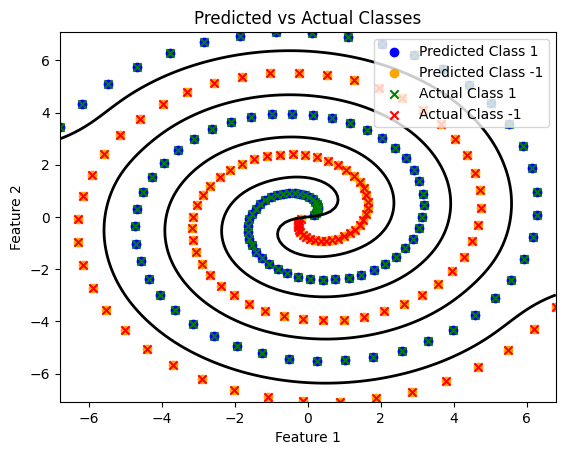

In [52]:

# Differentiate prediction data by label
predicted_class1 = X_test[y_test_pred == 1]
predicted_class2 = X_test[y_test_pred == -1]

# Differentiate actual data by label
actual_class1 = X_test[y_test == 1]
actual_class2 = X_test[y_test == -1]

# first run this, comment meshgrid
# X_test['feature1'] = X_test['feature1'].astype(float)
# X_test['feature2'] = X_test['feature2'].astype(float)

# after that comment two line above then run this
xx, yy = np.meshgrid(np.linspace(X_test['feature1'].min(), X_test['feature1'].max(), 100, dtype=float),np.linspace(X_test['feature2'].min(), X_test['feature2'].max(), 100, dtype=float))
'''
This code uses NumPy's meshgrid function to create a grid of points for feature1 and feature2. It generates a grid of 100x100 points within the minimum and maximum values of feature1 and feature2.

'''

Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()]) #  Here, the decision_function method of the model is used to calculate the distance of the samples to the separating hyperplane. It takes the flattened meshgrid points as input.
Z = Z.reshape(xx.shape) # This line reshapes the Z array to have the same shape as the meshgrid.

# Plot the predicted data
plt.scatter(predicted_class1['feature1'], predicted_class1['feature2'], color='blue', label='Predicted Class 1')
plt.scatter(predicted_class2['feature1'], predicted_class2['feature2'], color='orange', label='Predicted Class -1')
'''
This code creates a scatter plot of the predicted data points for class 1, using 'feature1' as the x-axis and 'feature2' as the y-axis, with blue color and a label.
'''
# Plot the actual data
plt.scatter(actual_class1['feature1'], actual_class1['feature2'], color='green', marker='x', label='Actual Class 1')
plt.scatter(actual_class2['feature1'], actual_class2['feature2'], color='red', marker='x', label='Actual Class -1')

# plot the classifier line
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='black')

# other setting for plot
plt.title('Predicted vs Actual Classes')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


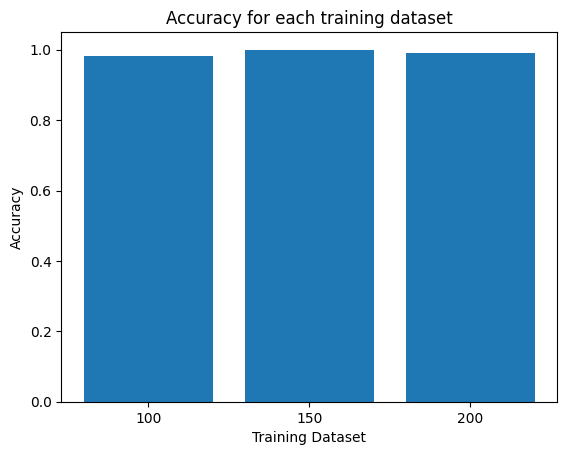

In [58]:
# Draw accuracy plot for each training dataset
accuracies = [accuracy100, accuracy150, accuracy200]
plt.bar(range(3), accuracies)
plt.xticks(range(3), ['100', '150', '200'])
plt.xlabel('Training Dataset')
plt.ylabel('Accuracy')
plt.title('Accuracy for each training dataset')
plt.show()